# Census Income Project

In [96]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('_','.')
X_train, X_test, y_train, y_test = exam_data_load(df, target='income', null_name='?')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 15), (6512, 15), (26048, 2), (6512, 2))

In [97]:
# Importing Libraries
import pandas as pd
import numpy as np

## EDA

In [98]:
X_train.shape, X_test.shape, y_train.shape

((26048, 15), (6512, 15), (26048, 2))

In [99]:

X_train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
17270,17270,29,Local-gov,220656,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States
26959,26959,44,Private,98211,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,55,United-States
7632,7632,37,Private,203828,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
27877,27877,38,Federal-gov,261241,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States
17508,17508,36,Private,192614,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,56,United-States


In [100]:

y_train['income'].value_counts()

 <=50K    19717
 >50K      6331
Name: income, dtype: int64

In [101]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 17270 to 25716
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26048 non-null  int64 
 1   age             26048 non-null  int64 
 2   workclass       26048 non-null  object
 3   fnlwgt          26048 non-null  int64 
 4   education       26048 non-null  object
 5   education.num   26048 non-null  int64 
 6   marital.status  26048 non-null  object
 7   occupation      26048 non-null  object
 8   relationship    26048 non-null  object
 9   race            26048 non-null  object
 10  sex             26048 non-null  object
 11  capital.gain    26048 non-null  int64 
 12  capital.loss    26048 non-null  int64 
 13  hours.per.week  26048 non-null  int64 
 14  native.country  26048 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.2+ MB


In [102]:

# Numeric features
numeric_features = [
                    'age',
                    'fnlwgt', 
                    'education.num',
                    'capital.gain', 
                    'capital.loss', 
                    'hours.per.week',                     
                   ]

# Categorical features
cat_features = [
                 'workclass',              
                 'education',            
                 'marital.status', 
                 'occupation', 
                 'relationship', 
                 'race', 
                 'sex',
                 'native.country'
]

# Describing Dataset

In [103]:
X_train[numeric_features].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.532325,1.896543e+05,10.081465,1067.640894,87.107839,40.439458
std,13.629332,1.048863e+05,2.566960,7304.887117,401.255703,12.300437
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177652e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.786440e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [104]:
X_train[cat_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,26048,26048,26048,26048,26048,26048,26048,26048
unique,9,16,7,15,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,18220,8417,12054,3288,10628,22267,17477,23386


# Null value Check

In [105]:
X_train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [106]:
X_test.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [107]:
X_train['workclass'].value_counts()

 Private             18220
 Self-emp-not-inc     1995
 Local-gov            1661
 ?                    1448
 State-gov            1034
 Self-emp-inc          887
 Federal-gov           788
 Without-pay             8
 Never-worked            7
Name: workclass, dtype: int64

In [108]:
X_train['occupation'].value_counts()

 Prof-specialty       3288
 Craft-repair         3288
 Exec-managerial      3238
 Adm-clerical         3051
 Sales                2901
 Other-service        2620
 Machine-op-inspct    1614
 ?                    1455
 Transport-moving     1304
 Handlers-cleaners    1110
 Farming-fishing       793
 Tech-support          734
 Protective-serv       525
 Priv-house-serv       119
 Armed-Forces            8
Name: occupation, dtype: int64

In [109]:
X_train['native.country'].value_counts()

 United-States                 23386
 Mexico                          510
 ?                               463
 Philippines                     155
 Germany                         109
 Canada                          103
 Puerto-Rico                      90
 India                            80
 El-Salvador                      77
 Cuba                             74
 England                          73
 Jamaica                          63
 South                            63
 China                            59
 Italy                            58
 Dominican-Republic               55
 Vietnam                          51
 Guatemala                        50
 Japan                            48
 Poland                           46
 Columbia                         45
 Taiwan                           38
 Iran                             35
 Haiti                            34
 Portugal                         29
 Ecuador                          23
 Nicaragua                        23
 

In [110]:
def data_fillna(df):
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
    df['occupation'] = df['occupation'].fillna("null")
    df['native.country'] = df["native.country"].fillna(df['native.country'].mode()[0])
    return df

X_train = data_fillna(X_train)
X_test = data_fillna(X_test)

X_train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

# Model Implementation

In [111]:

from sklearn.preprocessing import LabelEncoder

all_df = pd.concat([X_train.assign(ind="train"), X_test.assign(ind="test")])
le = LabelEncoder()
all_df[cat_features] = all_df[cat_features].apply(le.fit_transform)

X_train = all_df[all_df['ind'] == 'train']
X_train = X_train.drop('ind',axis=1)
X_train

X_test = all_df[all_df['ind'] == 'test']
X_test = X_test.drop('ind',axis=1)
X_test

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
17960,17960,37,4,215476,11,9,4,6,4,2,0,0,0,30,39
14169,14169,49,4,28791,15,10,0,8,1,4,0,0,0,40,39
1776,1776,59,2,147707,11,9,6,5,4,4,1,0,2339,40,39
29410,29410,27,4,279580,9,13,4,12,1,4,1,10520,0,45,39
8602,8602,62,2,407669,5,4,6,8,1,2,0,0,0,35,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17277,17277,26,4,184026,15,10,4,10,1,3,1,0,0,50,39
31221,31221,30,4,297155,15,10,0,1,4,2,0,0,0,40,39
29979,29979,20,4,203027,11,9,4,5,1,4,1,0,0,55,39
20425,20425,24,4,210029,11,9,4,1,1,4,0,0,2001,37,39


In [112]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
X_train

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
17270,17270,0.164384,2,0.141516,9,0.800000,2,4,0,2,1,0.00000,0.0,0.397959,39
26959,26959,0.369863,4,0.058357,9,0.800000,2,14,0,4,1,0.00000,0.0,0.551020,39
7632,7632,0.273973,4,0.130087,6,0.266667,2,3,0,4,1,0.00000,0.0,0.397959,39
27877,27877,0.287671,1,0.169079,15,0.600000,2,1,0,4,1,0.00000,0.0,0.448980,39
17508,17508,0.260274,4,0.122471,11,0.533333,0,7,1,4,1,0.00000,0.0,0.561224,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,2669,0.465753,4,0.153115,11,0.533333,2,6,0,4,1,0.03103,0.0,0.397959,39
17536,17536,0.109589,0,0.154056,9,0.800000,4,0,1,4,1,0.00000,0.0,0.122449,39
6201,6201,0.273973,4,0.115062,8,0.666667,2,3,0,4,1,0.00000,0.0,0.397959,39
27989,27989,0.219178,4,0.116632,11,0.533333,4,14,1,4,1,0.00000,0.0,0.397959,39


In [113]:

y = (y_train['income'] != ' <=50K').astype(int)
y[:5]

17270    1
26959    0
7632     0
27877    1
17508    0
Name: income, dtype: int32

In [114]:

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, test_size=0.15, random_state=2021)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((22140, 15), (3908, 15), (22140,), (3908,))

In [115]:
X_tr.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1437,1437,0.328767,6,0.087639,12,0.866667,0,10,4,4,0,0.0,0.0,0.346939,39
7151,7151,0.095890,4,0.014080,15,0.600000,4,3,3,4,1,0.0,0.0,0.397959,39
30295,30295,0.068493,4,0.024927,15,0.600000,4,14,1,4,1,0.0,0.0,0.397959,39
15372,15372,0.000000,4,0.056719,1,0.400000,4,12,3,4,0,0.0,0.0,0.173469,39
13800,13800,0.301370,6,0.061684,9,0.800000,2,10,0,4,1,0.0,0.0,0.500000,39


In [116]:

X_tr = X_tr.drop('id', axis=1)
X_val = X_val.drop('id', axis=1)

In [117]:

X_tr.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1437,0.328767,6,0.087639,12,0.866667,0,10,4,4,0,0.0,0.0,0.346939,39


In [118]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score:', (accuracy_score(y_val, pred)))

accuracy score: 0.8134595701125895


In [119]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score:', (accuracy_score(y_val, pred)))

accuracy score: 0.8582395087001023


In [120]:

X_test_id = X_test.pop('id')
pred = model.predict(X_test)

In [121]:

output = pd.DataFrame({'id': X_test_id, 'income':pred})
output.to_csv("000000.csv", index=False)
output.head()

,id,income
17960,17960,0
14169,14169,0
1776,1776,0
29410,29410,1
8602,8602,0


# Accuracy Score

In [122]:
y_test = (y_test['income'] != ' <=50K').astype(int)
from sklearn.metrics import accuracy_score
print('accuracy score:', (accuracy_score(y_test, pred)))

accuracy score: 0.863482800982801


0.9043943285342002


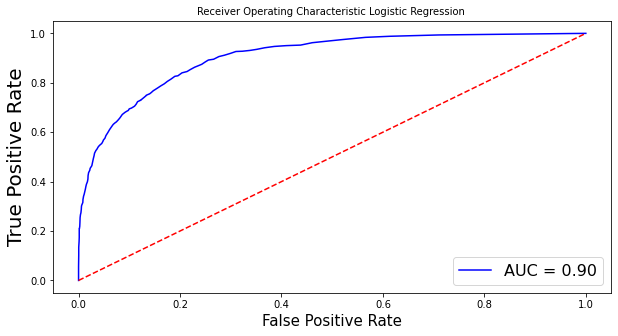

In [123]:
from sklearn import metrics
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
probs = model.predict_proba(X_val)
preds = probs[:,1]
fprlr, tprlr, thresholdlr = metrics.roc_curve(y_val, preds)
#print("False Positive Rate:",fprlr)
#print("True Positive Rate:",tprlr)
#print("Threshold:",thresholdlr)
roc_auclr = metrics.auc(fprlr, tprlr)
print(roc_auclr)

ax.plot(fprlr, tprlr, 'b', label = 'AUC = %0.2f' % roc_auclr)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})